In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_dataset(path: Path) -> pd.DataFrame:
    df = pd.read_json(path)
    df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S")
    df.set_index('date', inplace=True)
    return df


df = load_dataset("../datasets/Hydra-L.json")
df.head()

,BME280_temp,BME280_humidity,BME280_pressure
date,,,
2022-07-06 00:00:04,30.45,34.93,746.19
2022-07-06 00:00:29,30.55,34.55,745.17
2022-07-06 00:00:30,28.27,43.74,746.70
2022-07-06 00:00:32,30.62,35.08,746.40
2022-07-06 00:00:33,27.05,45.82,746.68


In [11]:
def aggregate(x, freq='12h'):
    sample = x.resample(freq)
    return sample.min(), sample.mean(), sample.max()

In [20]:
def plot_minmax(series: pd.Series, label: str, freq='12h'):
    df_min, df_mean, df_max = aggregate(series, freq)
    plt.fill_between(df_mean.index, df_min, df_max, alpha=0.5)
    plt.plot(df_mean, c='orange')
    plt.ylabel(label)
    plt.xticks(rotation=45)
    plt.show()


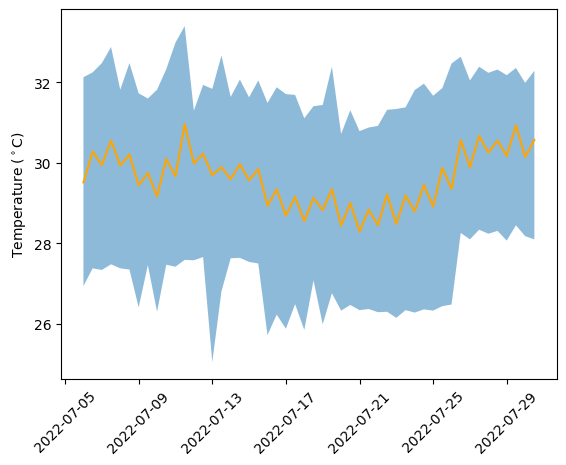

In [21]:
plot_minmax(df.BME280_temp, r'Temperature ($^\circ$C)')


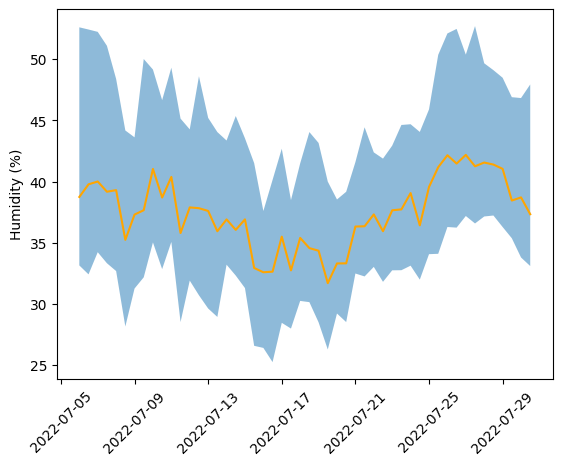

In [22]:
plot_minmax(df.BME280_humidity, r'Humidity (%)')


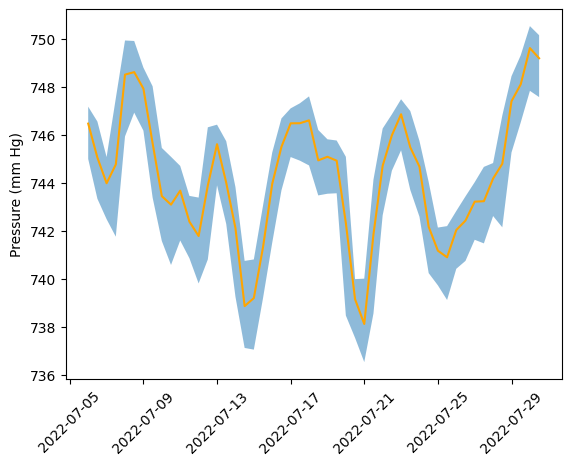

In [23]:
plot_minmax(df.BME280_pressure, r'Pressure (mm Hg)')


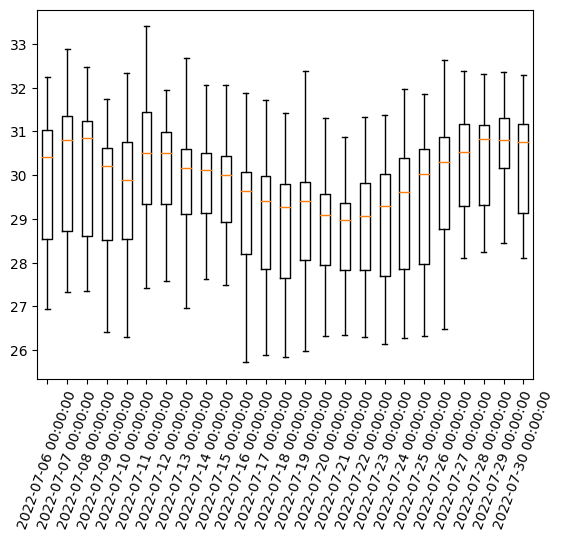

In [18]:
gb = df.BME280_temp.groupby(pd.Grouper(freq='d'))
Y = [np.array(gb.get_group(x)) for x in gb.groups]
X = [x for x in gb.groups]

plt.boxplot(Y, labels=X, showfliers=False)
plt.xticks(rotation=70)
plt.show()
